In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import tensorflow as tf

print("Toutes les bibliothèques sont bien installées !")


Toutes les bibliothèques sont bien installées !


In [63]:
import os

# Définir les chemins - utilisez un chemin brut ou des barres obliques
train_dir = r'C:\Users\Probook\OneDrive\Bureau\DeepLearningTask\DeepLearningTask-1\DeepLearning 24-25\Train'
test_dir = r'C:\Users\Probook\OneDrive\Bureau\DeepLearningTask\DeepLearningTask-1\DeepLearning 24-25\Test'

# Vérifier les catégories dans le dossier Train
categories = os.listdir(train_dir)
print(f"Catégories dans le dossier d'entraînement : {categories}")

# Vérifier le nombre d'images dans chaque catégorie
for category in categories:
    category_path = os.path.join(train_dir, category)
    num_images = len(os.listdir(category_path))
    print(f"{category} : {num_images} images")


Catégories dans le dossier d'entraînement : ['Bear', 'Camel', 'Chiken', 'Elephent', 'Horse', 'Lion', 'Squirrel']
Bear : 346 images
Camel : 353 images
Chiken : 346 images
Elephent : 337 images
Horse : 355 images
Lion : 340 images
Squirrel : 315 images


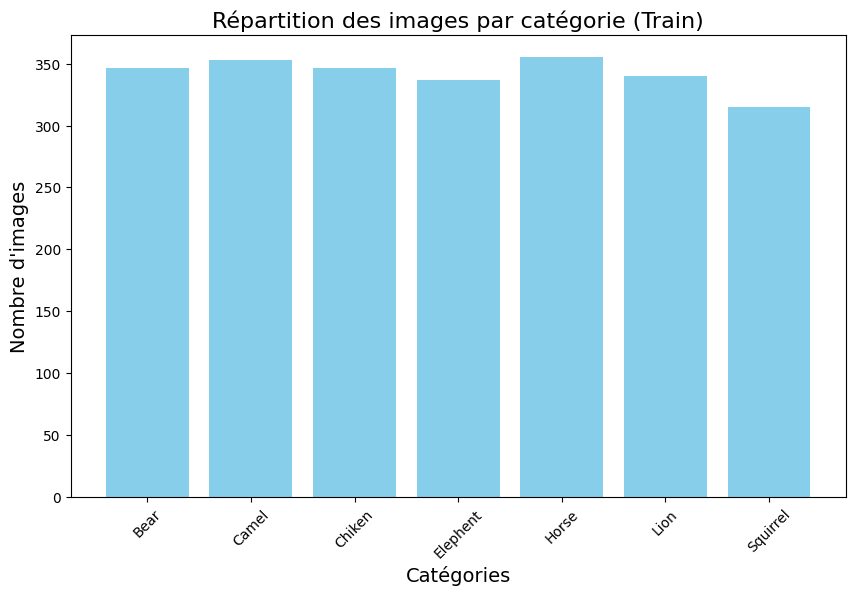

In [64]:
import matplotlib.pyplot as plt

# Compter le nombre d'images dans chaque catégorie
class_counts = {}
for category in categories:
    category_path = os.path.join(train_dir, category)
    num_images = len(os.listdir(category_path))
    class_counts[category] = num_images

# Tracer la répartition
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Répartition des images par catégorie (Train)", fontsize=16)
plt.xlabel("Catégories", fontsize=14)
plt.ylabel("Nombre d'images", fontsize=14)
plt.xticks(rotation=45)
plt.show()


Largeur moyenne : 506.67px
Hauteur moyenne : 441.00px
Largeur max : 2000px, Hauteur max : 1355px
Largeur min : 256px, Hauteur min : 256px


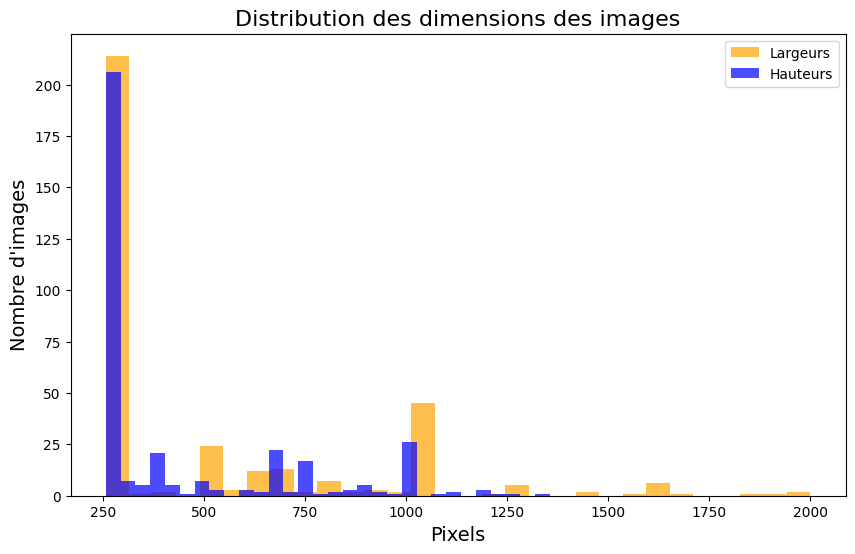

In [65]:
from PIL import Image

# Initialiser des listes pour stocker les dimensions
widths = []
heights = []

for category in categories:
    category_path = os.path.join(train_dir, category)
    for img_name in os.listdir(category_path)[:50]:  # Analyse des 50 premières images
        img_path = os.path.join(category_path, img_name)
        with Image.open(img_path) as img:
            widths.append(img.size[0])
            heights.append(img.size[1])

# Afficher les statistiques
print(f"Largeur moyenne : {sum(widths)/len(widths):.2f}px")
print(f"Hauteur moyenne : {sum(heights)/len(heights):.2f}px")
print(f"Largeur max : {max(widths)}px, Hauteur max : {max(heights)}px")
print(f"Largeur min : {min(widths)}px, Hauteur min : {min(heights)}px")

# Tracer un graphique des tailles
plt.figure(figsize=(10, 6))
plt.hist(widths, bins=30, color='orange', alpha=0.7, label='Largeurs')
plt.hist(heights, bins=30, color='blue', alpha=0.7, label='Hauteurs')
plt.title("Distribution des dimensions des images", fontsize=16)
plt.xlabel("Pixels", fontsize=14)
plt.ylabel("Nombre d'images", fontsize=14)
plt.legend()
plt.show()


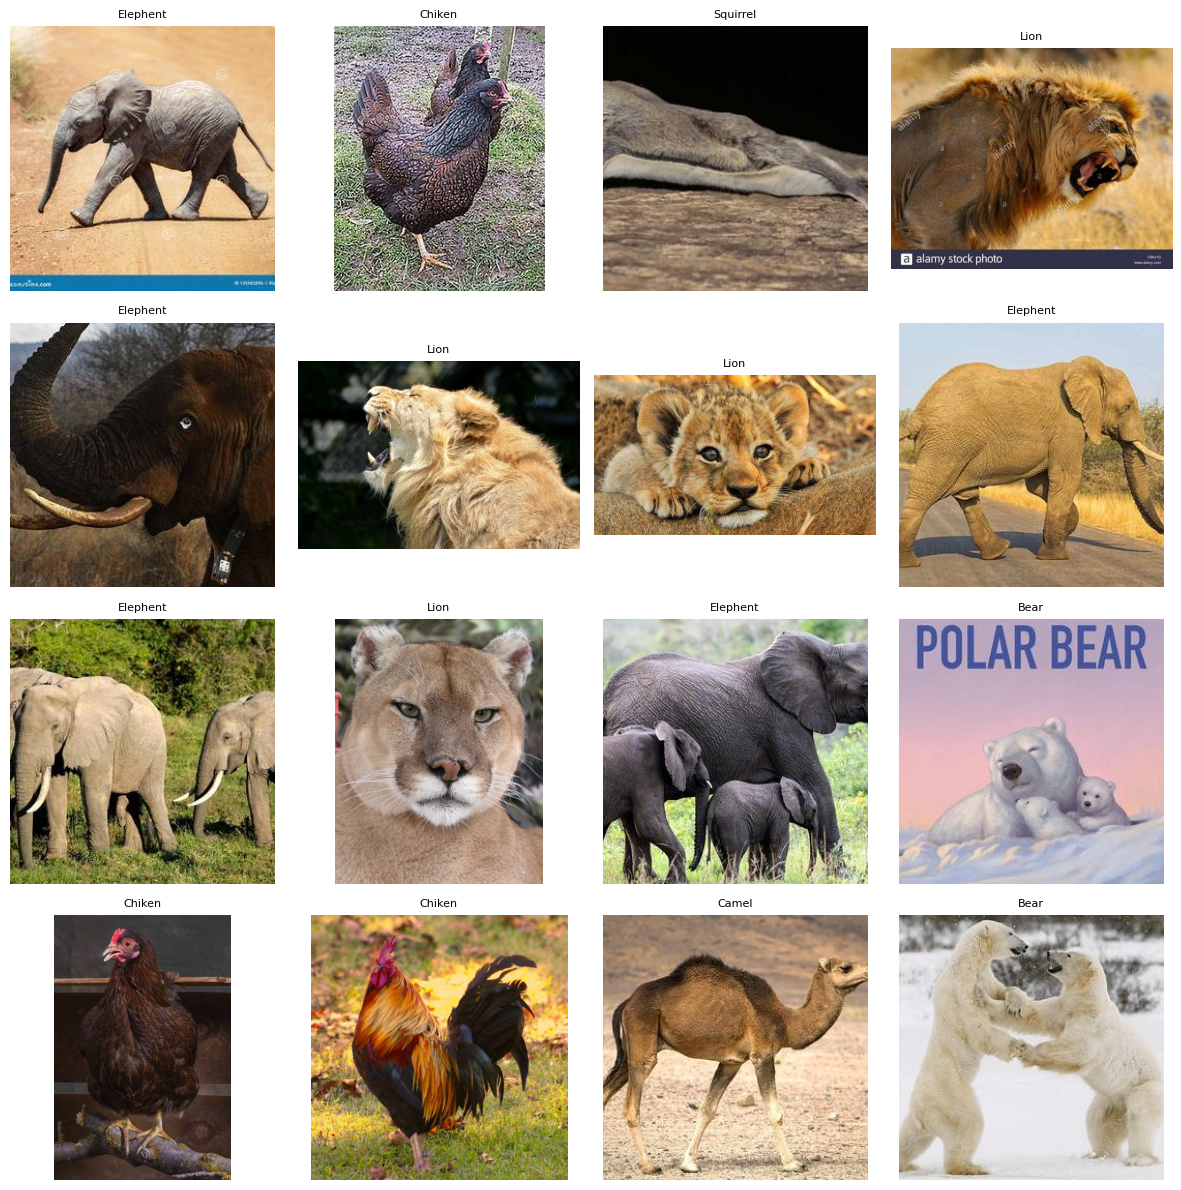

In [66]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def visualize_sample_images(image_dir, categories, num_samples=16):
    """
    Visualise un échantillon d'images avec leurs étiquettes.
    
    Args:
        image_dir (str): Chemin du dossier contenant les catégories.
        categories (list): Liste des catégories (noms des dossiers).
        num_samples (int): Nombre total d'images à afficher.
    """
    all_images = []

    # Charger les chemins et labels pour toutes les images
    for category in categories:
        category_path = os.path.join(image_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            all_images.append((img_path, category))

    # Convertir en tableau NumPy pour la compatibilité
    all_images = np.array(all_images, dtype=object)

    # Sélectionner des échantillons aléatoires
    sample_indices = np.random.choice(len(all_images), size=min(num_samples, len(all_images)), replace=False)
    sample_data = all_images[sample_indices]

    # Afficher les images
    plt.figure(figsize=(12, 12))
    for i, (file_path, label) in enumerate(sample_data):
        try:
            with Image.open(file_path) as img:
                plt.subplot(int(np.sqrt(num_samples)), int(np.sqrt(num_samples)), i + 1)
                plt.imshow(img)
                plt.title(label, fontsize=8)
                plt.axis('off')
        except Exception as e:
            print(f"Erreur lors de l'affichage de l'image {file_path}: {e}")
    plt.tight_layout()
    plt.show()

# Appeler la fonction pour visualiser des images
visualize_sample_images(train_dir, categories)
